Cài đặt thư viện

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import  GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Đọc dữ liệu

In [97]:
# Đọc file CSV và chuyển thành DataFrame
data = pd.read_csv("/content/Hotel Reservations.csv")
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


Overview dữ liệu

In [81]:
data.shape

(36275, 19)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   



*   Booking_ID: ID của booking
*   no_of_adults: Số lượng người lớn
*   no_of_children: Số lượng trẻ em
*   no_of_weekend_nights: Số đêm cuối tuần đã ở hay đã đăt để ở tại khách sạn (Thứ 7 hoặc chủ nhật)
*   no_of_week_nights: Số đêm trong tuần đã ở hay đã đăt để ở tại khách sạn
(từ thứ hai đến thứ 6)
*   type_of_meal_plan: Loại kế hoạch ăn uống được đặt bởi khách hàng
*   required_car_parking_space: Khách hàng có yêu cầu chỗ đậu xem hay là không.
*   room_type_reserved: Loại phòng được đặt bởi khách hàng
*   lead_time: Số ngày từ ngày đặt đến ngày chuyển đến khách sạn
*   arrival_year: Năm của ngày chuyển đến
*   arrival_month: Tháng của ngày chuyển đến
*   arrival_date: Ngày của tháng chuyển đến
*   market_segment_type: Chỉ định phân khúc thị trường (online / offline)
*   repeated_guest: Có phải khách hàng cũ hay không.
*   no_of_previous_cancellations: Số lượng lần đặt bị hủy của khách trước đó
*   no_of_previous_booking_not_cancelled: Số lượng lần đặt không bị hủy của khách trước đó
*   avg_price_per_room: Giá trung bình mỗi ngày của phòng đặt, giá phòng là linh động
*   no_of_special_requests: Số lượng yêu cầu đặt biệt của khách hàng
*   booking_status: Đặt phòng bị hủy hay không bị hủy





In [45]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [126]:
data.duplicated().sum()

0

Phân tích từng cột

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64


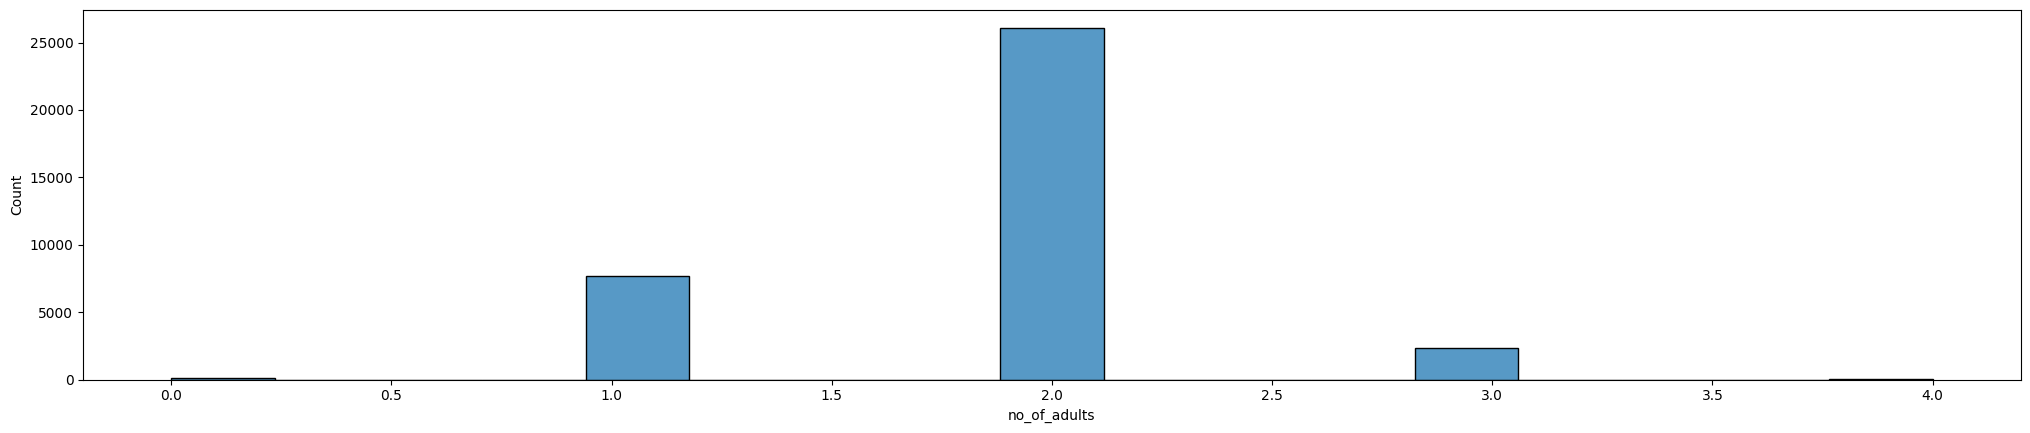

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64


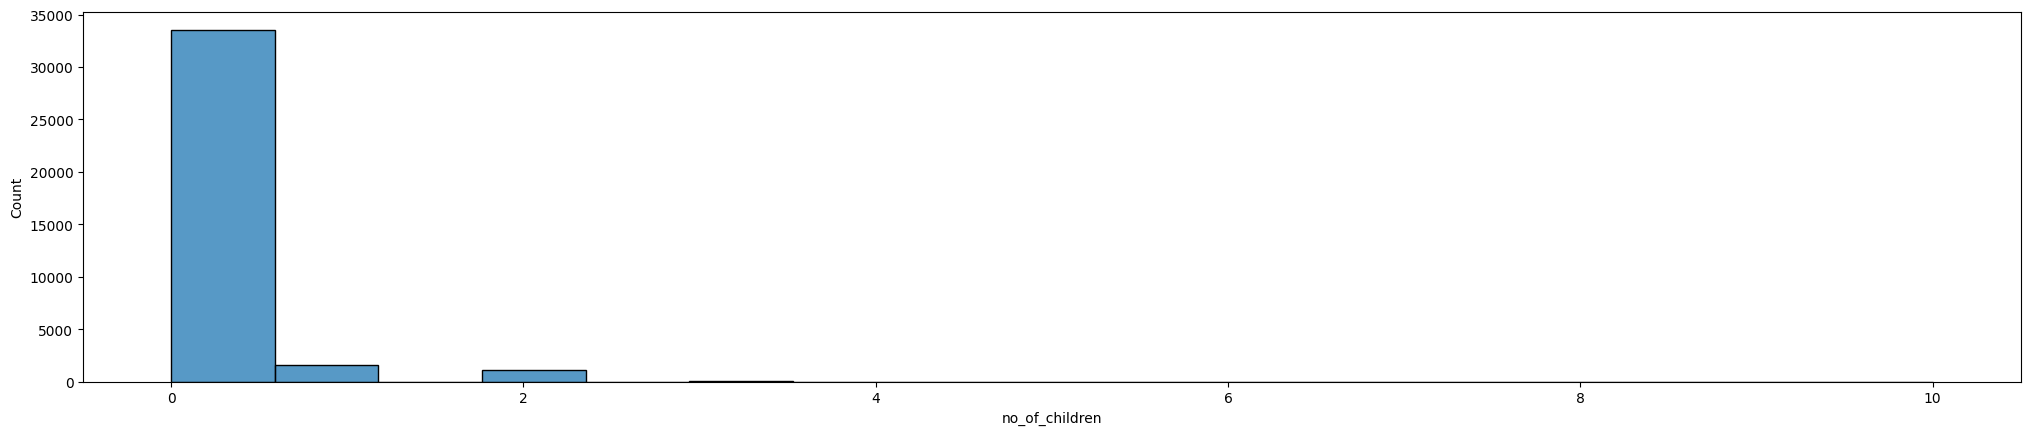

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64


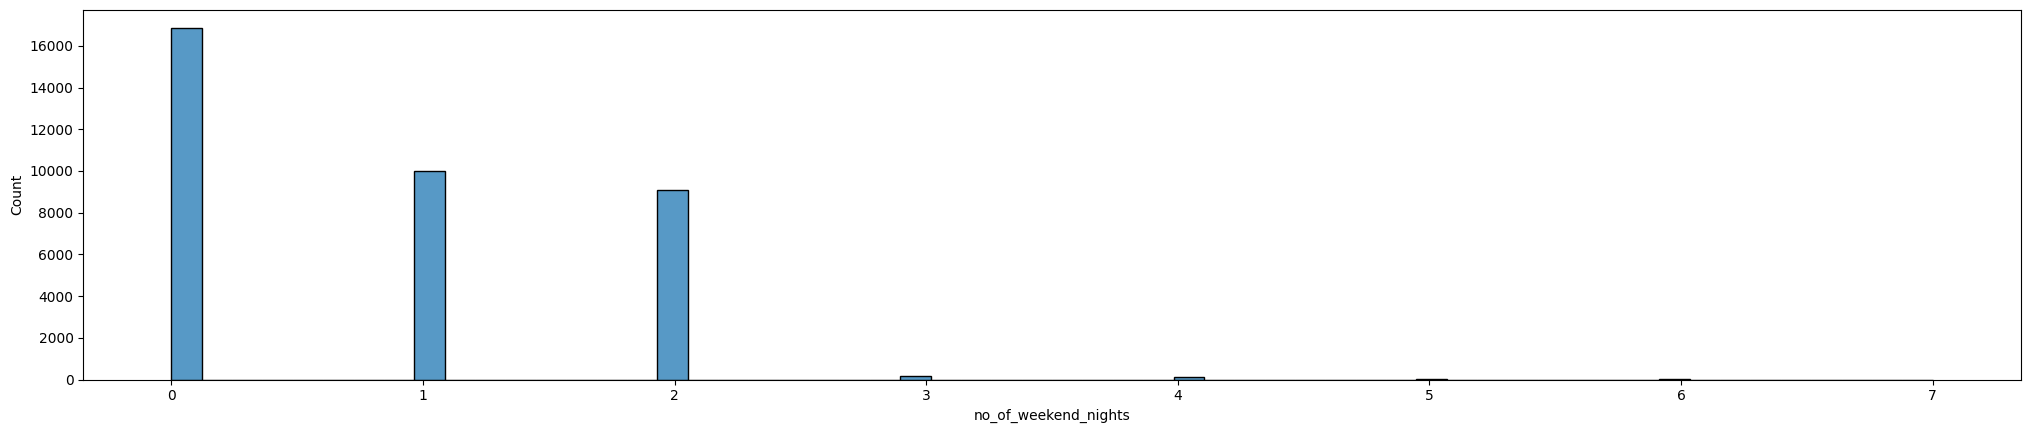

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64


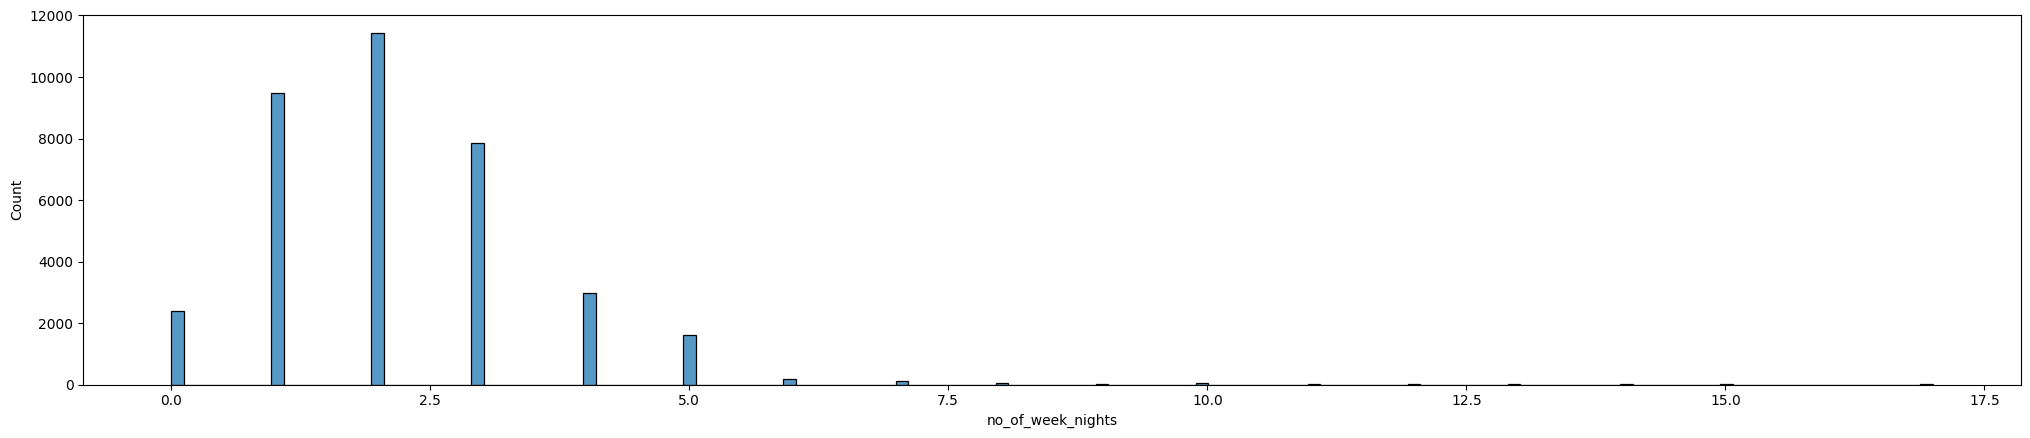

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


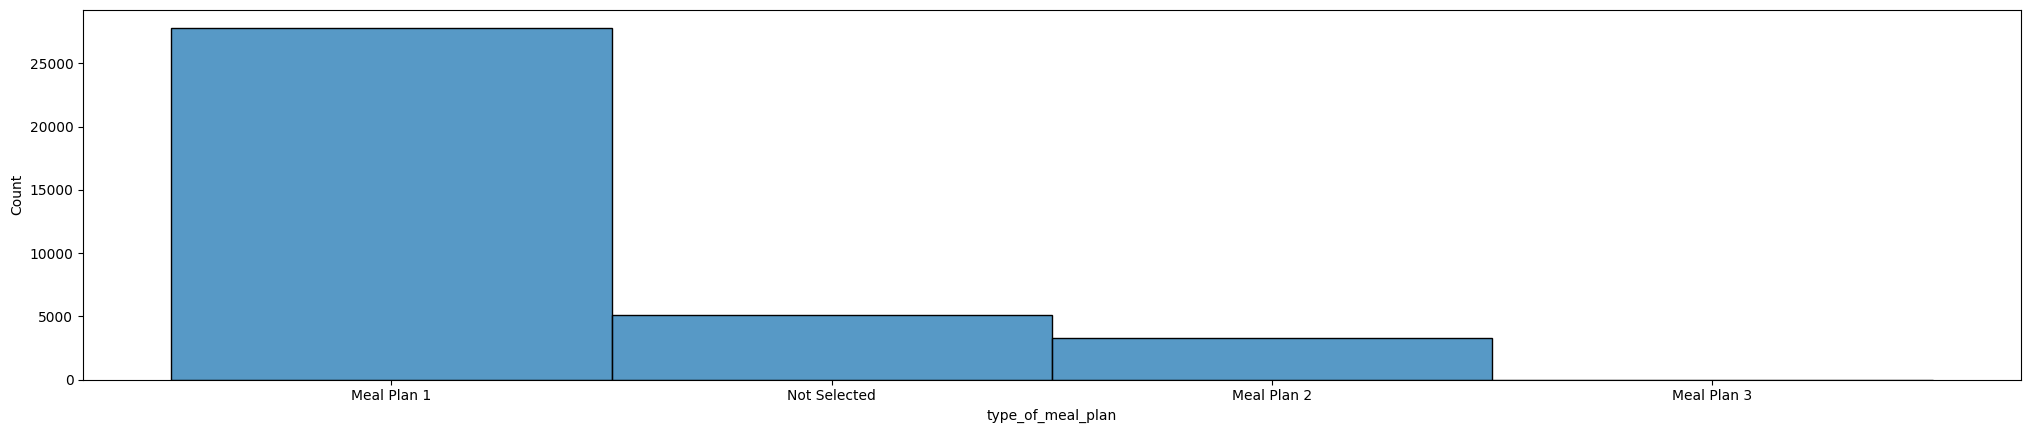

required_car_parking_space
0    35151
1     1124
Name: required_car_parking_space, dtype: int64


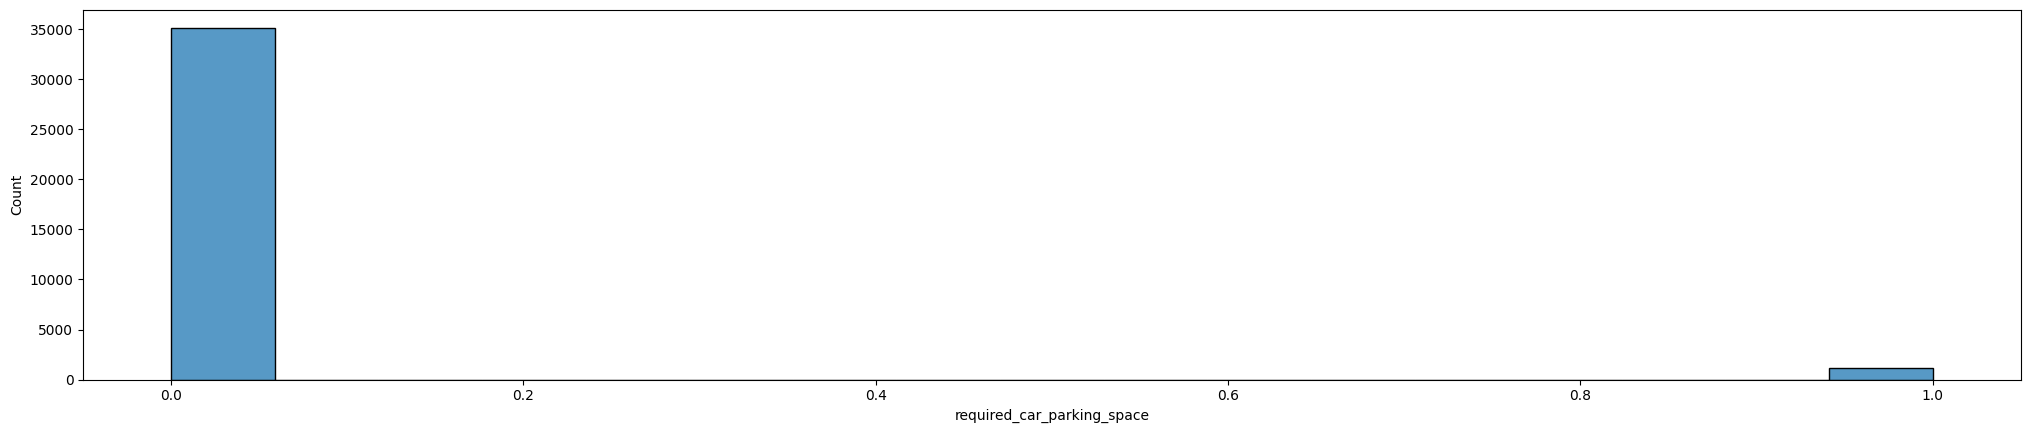

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


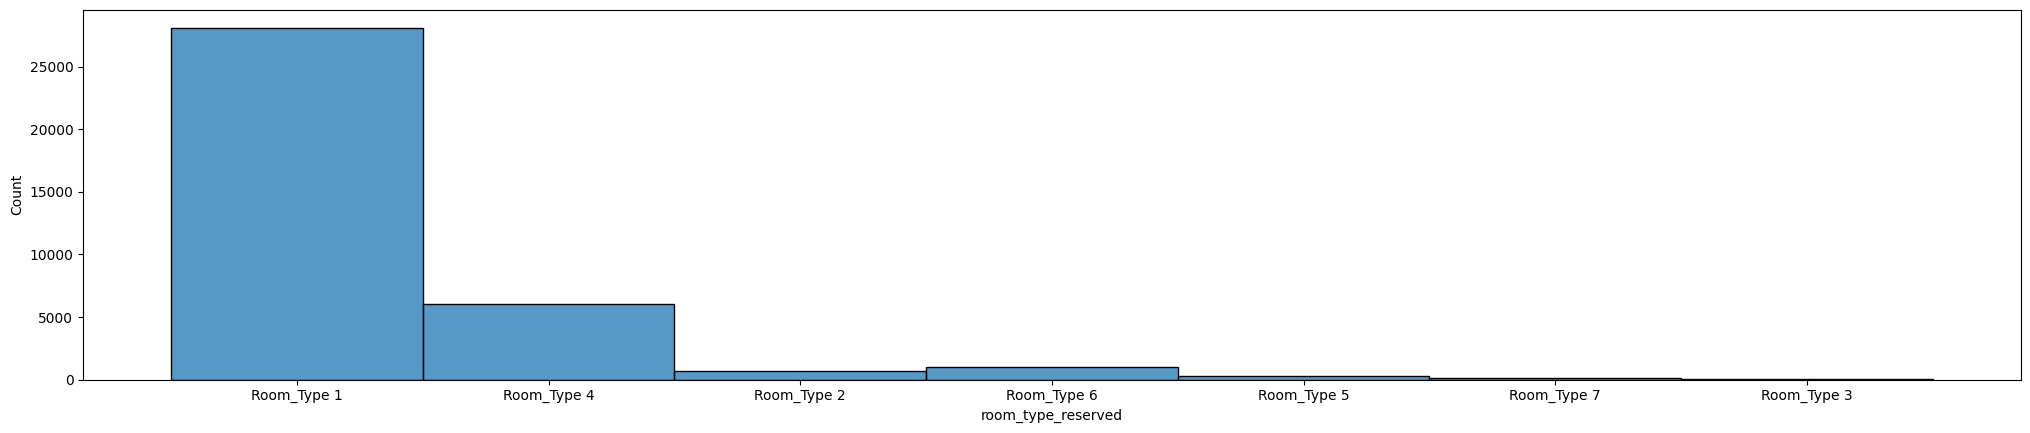

lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64


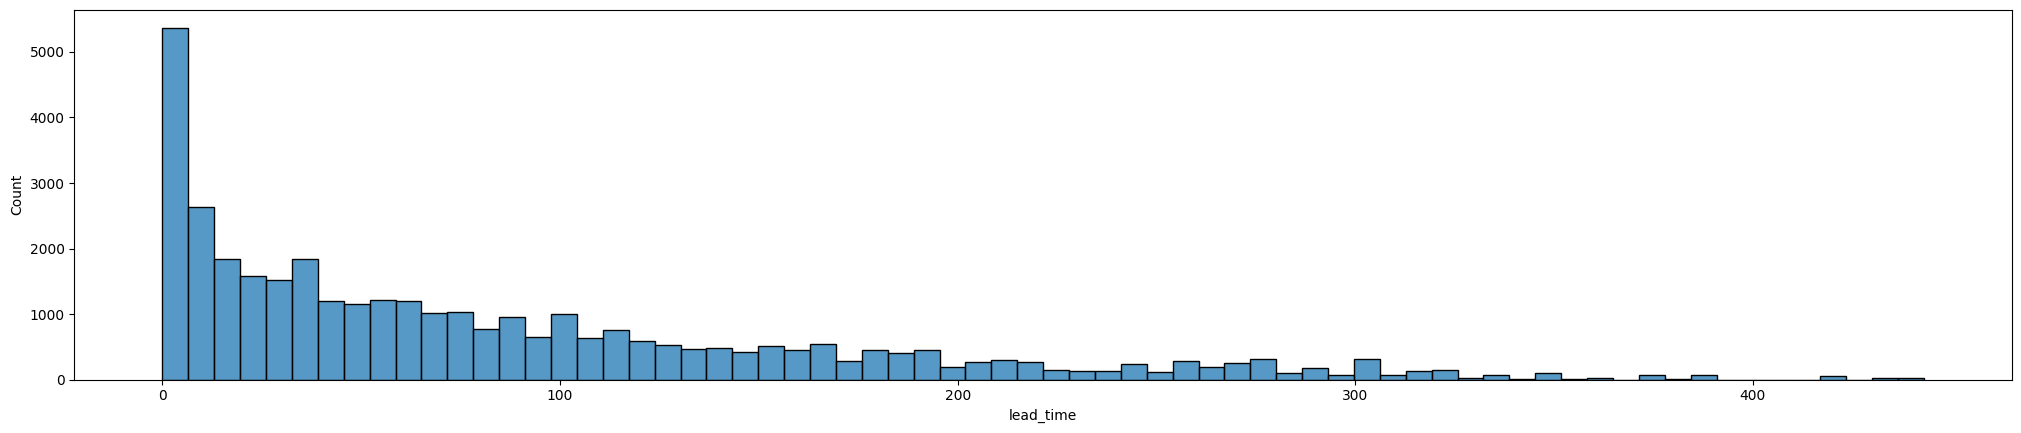

arrival_year
2018    29761
2017     6514
Name: arrival_year, dtype: int64


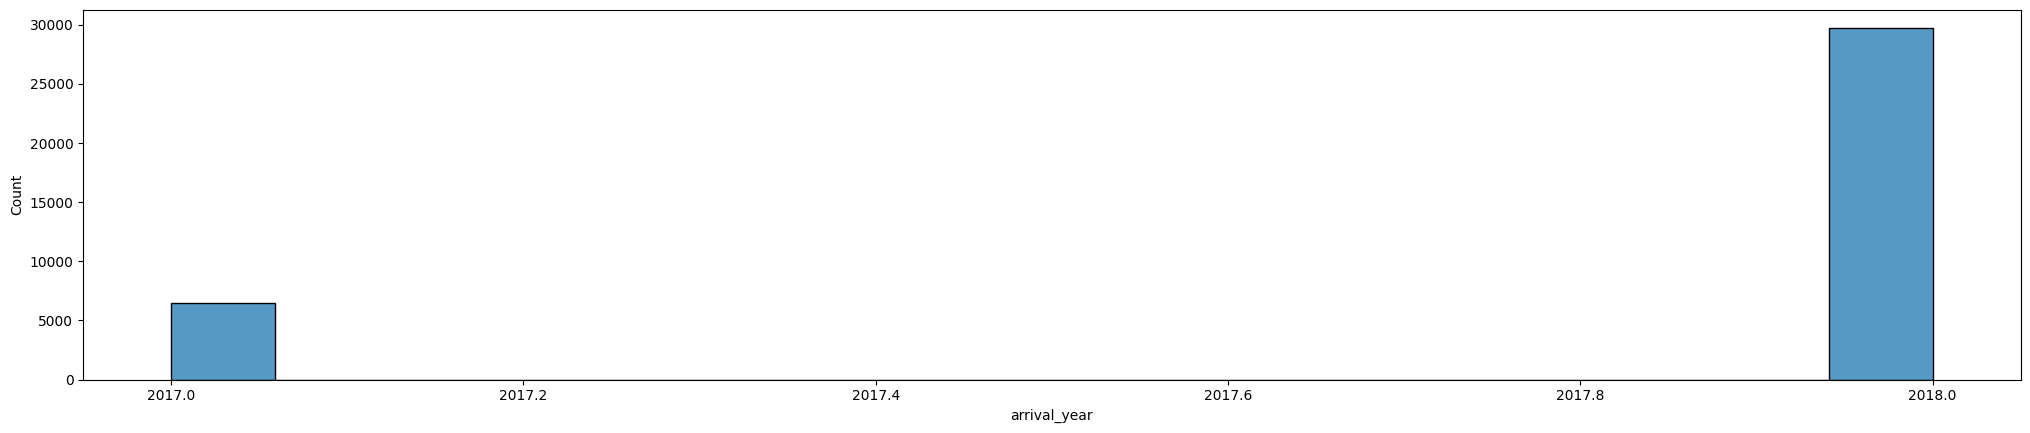

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64


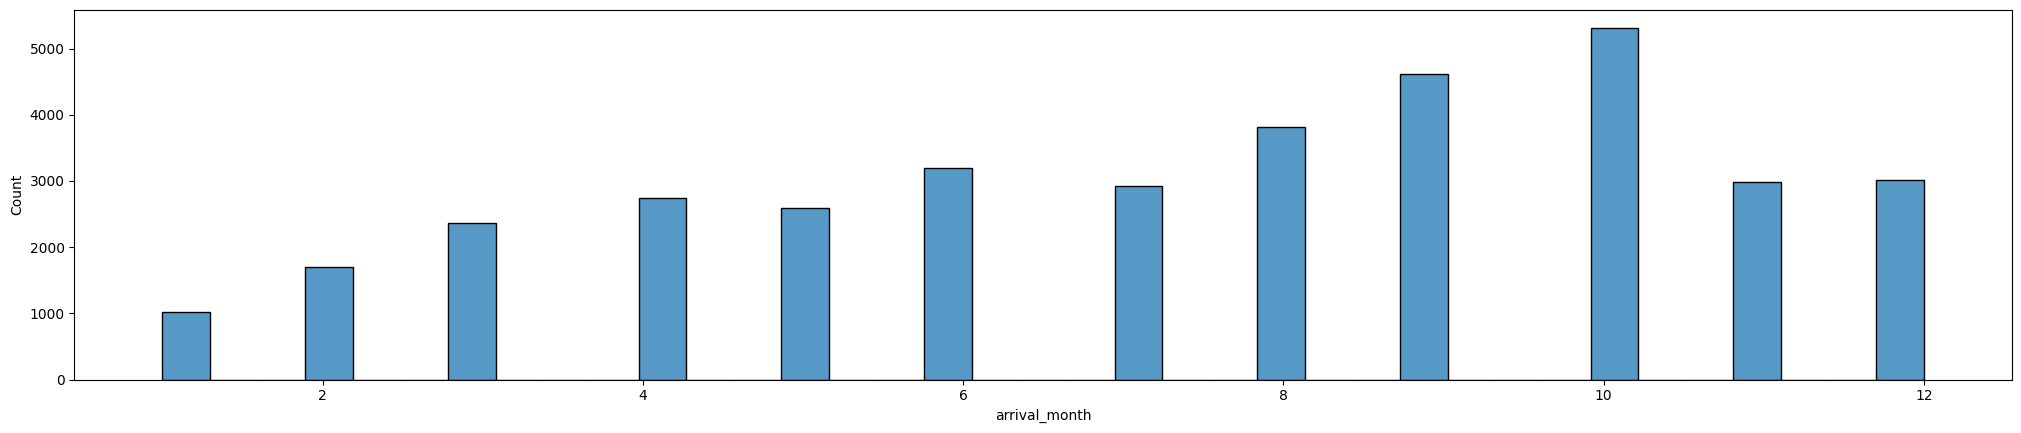

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64


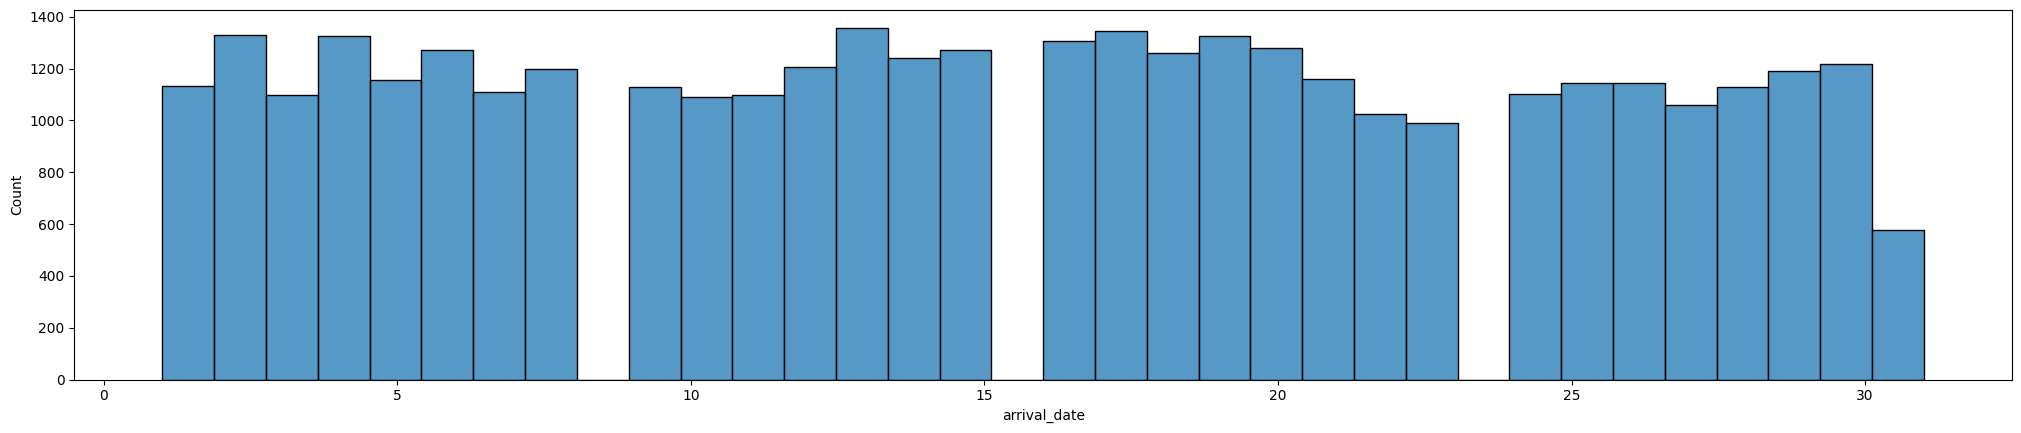

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


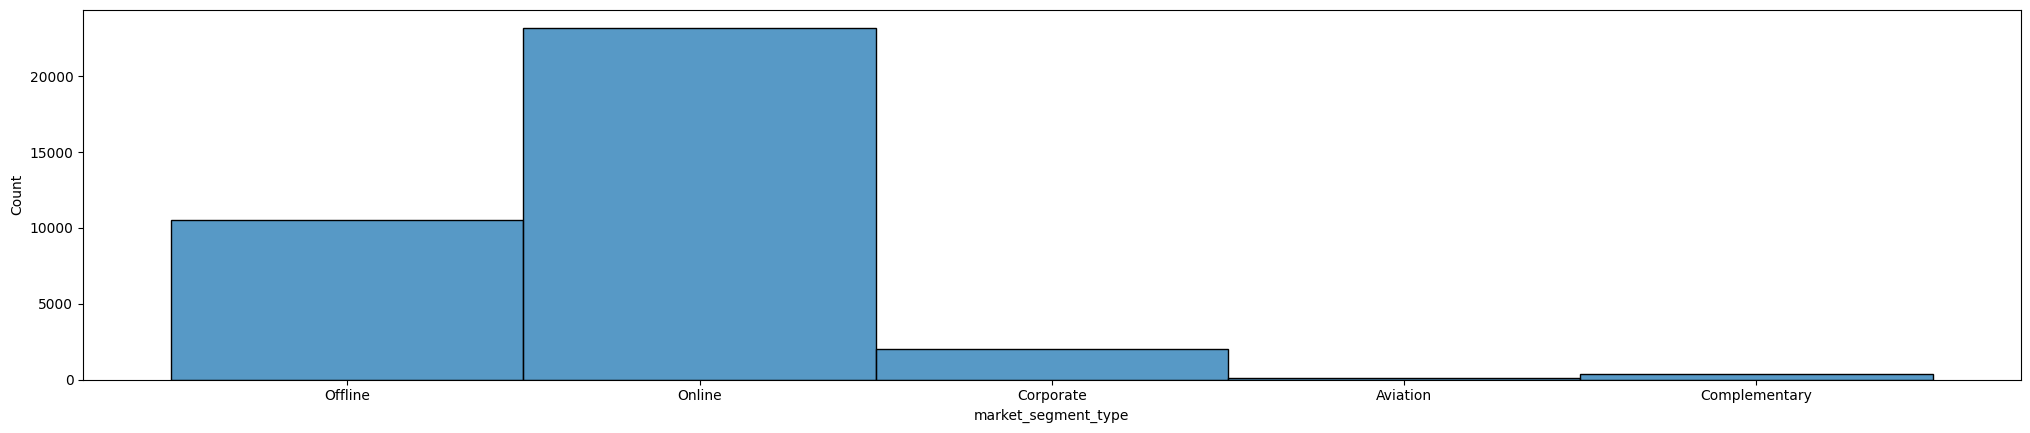

repeated_guest
0    35345
1      930
Name: repeated_guest, dtype: int64


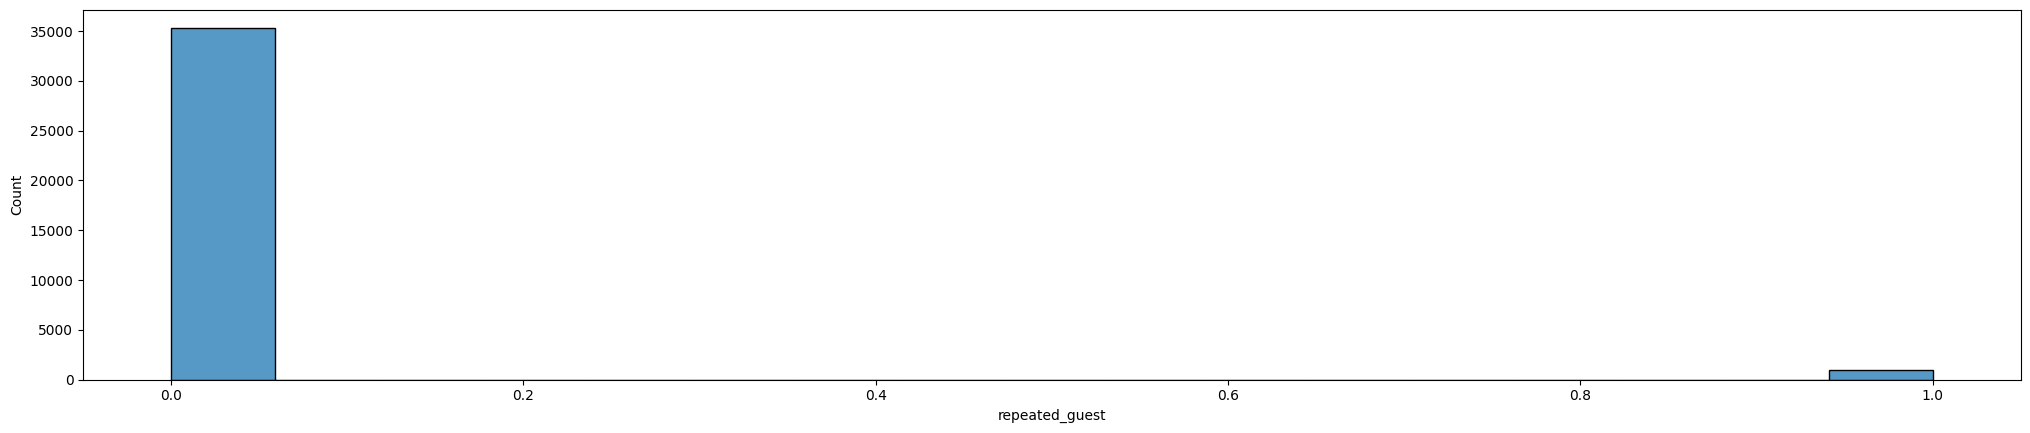

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64


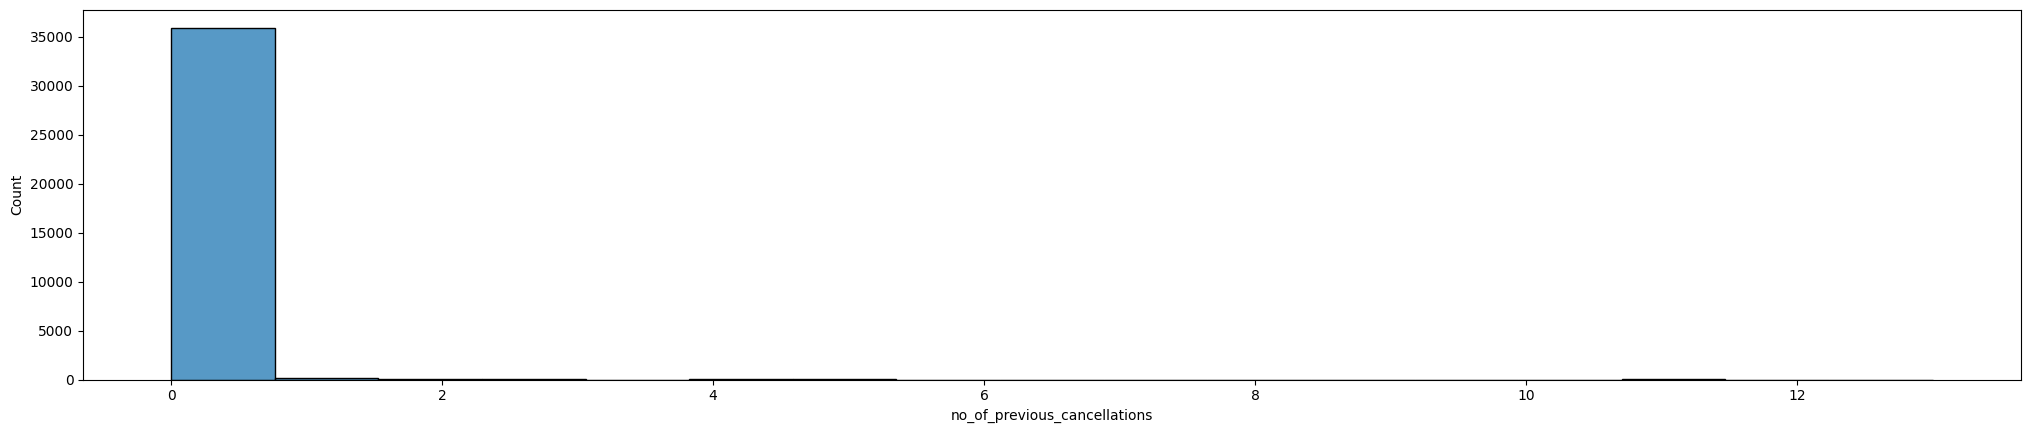

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64


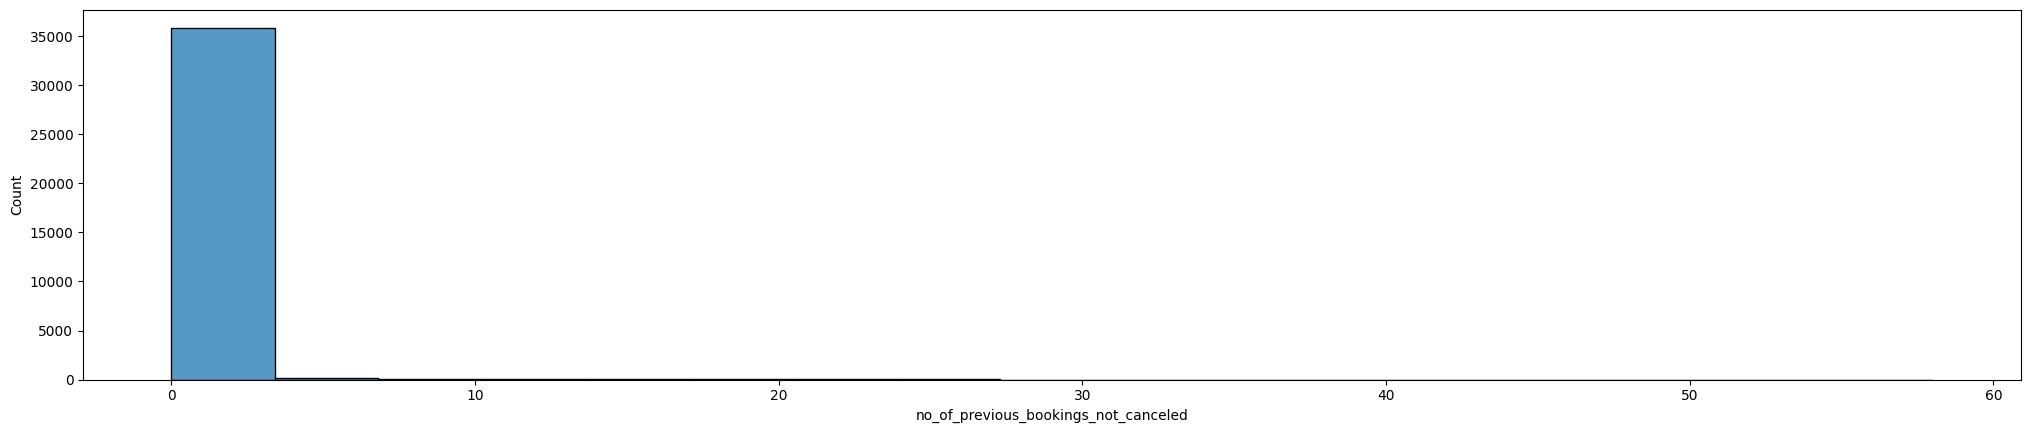

avg_price_per_room
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64


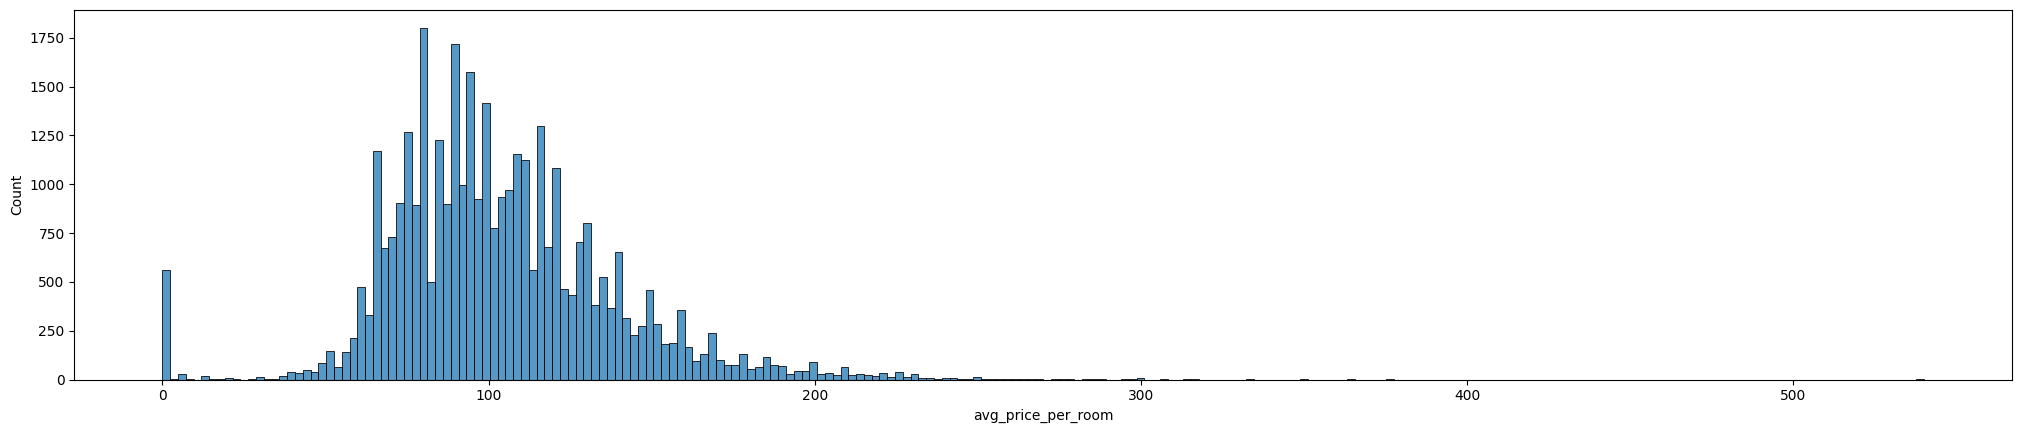

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64


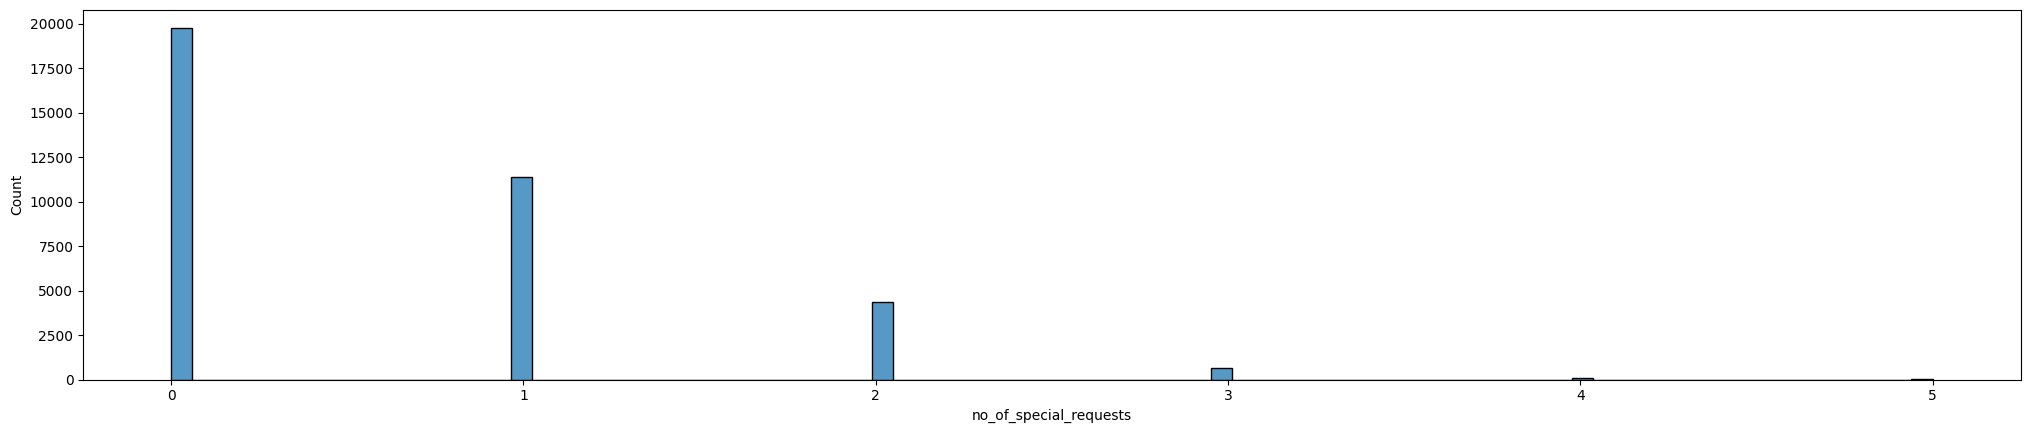

booking_status
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


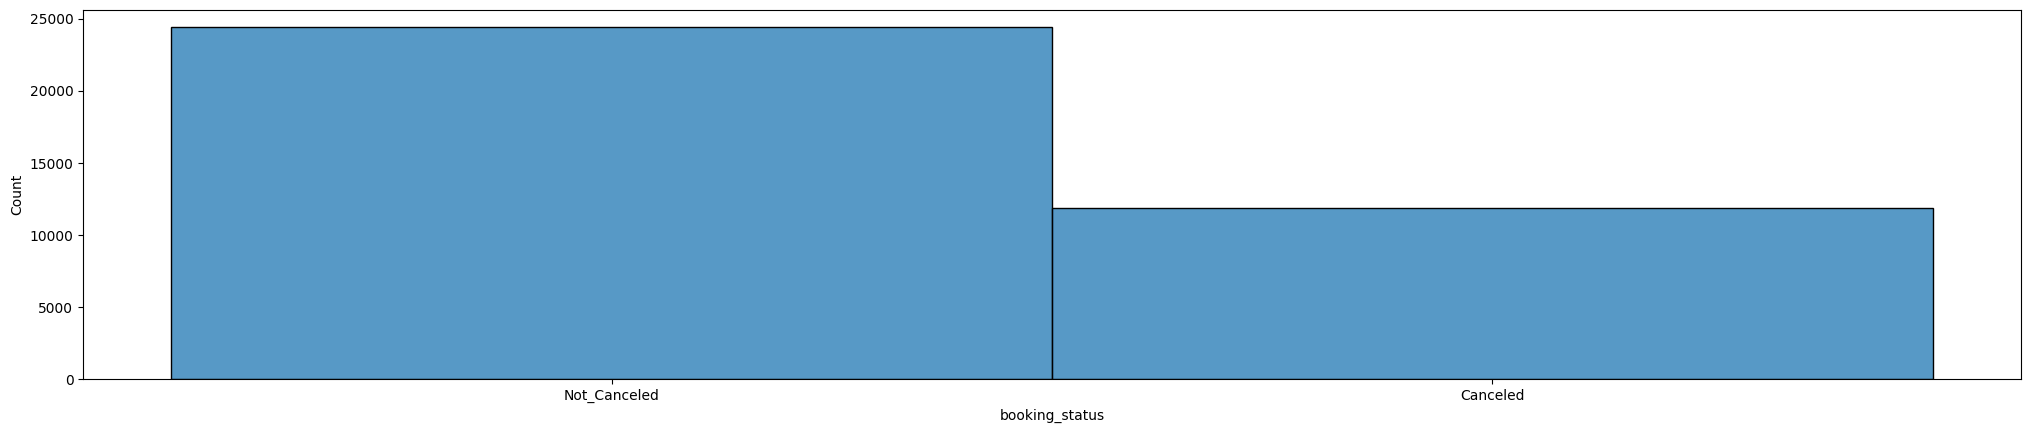

In [ ]:
colunms = list(data.columns)
for c in colunms:
  if c != "Booking_ID":
    print(c)
    print(data[c].value_counts())
    plt.figure().set_figwidth(25)
    k = sns
    k.histplot(data = data[c])
    plt.show(k)


In [3]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Tiền xử lí dữ liệu

In [8]:
object_cols = [f for f in data.columns if data[f].dtype == "O"]
print(object_cols)


['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [83]:
data["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [98]:
def chuyen_doi_type_of_meal_plan(x):
  if x == "Not Selected":
    return 0
  elif x == "Meal Plan 1":
    return 1
  elif x == "Meal Plan 2":
    return 2
  elif x == "Meal Plan 3":
    return 3

data["type_of_meal_plan"] = data["type_of_meal_plan"].apply(chuyen_doi_type_of_meal_plan)
  

In [70]:
data["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [99]:
def chuyen_doi_room_type_reserved(x):
  if x == "Room_Type 1":
    return 0
  elif x == "Room_Type 2":
    return 1
  elif x == "Room_Type 3":
    return 2
  elif x == "Room_Type 4":
    return 3
  elif x == "Room_Type 5":
    return 4
  elif x == "Room_Type 6":
    return 5
  elif x == "Room_Type 7":
    return 6

data["room_type_reserved"] = data["room_type_reserved"].apply(chuyen_doi_room_type_reserved)


In [72]:
data["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [100]:
def chuyen_doi_market_segment_type(x):
  if x == "Online":
    return 0
  elif x == "Offline":
    return 1
  elif x == "Corporate":
    return 2
  elif x == "Complementary":
    return 3
  elif x == "Aviation":
    return 4

data["market_segment_type"] = data["market_segment_type"].apply(chuyen_doi_market_segment_type)
  

In [15]:
data["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [101]:
def chuyen_doi_booking_status(x):
  if x == "Not_Canceled":
    return 0
  elif x == "Canceled":
    return 1
data["booking_status"] = data["booking_status"].apply(chuyen_doi_booking_status)  

Loại bỏ dữ liệu ngoại lai sử dụng IQR

> Văn bản được thụt lề



In [103]:
C = ["avg_price_per_room" ,"lead_time"]
for c in C:
  Q1 = data[c].quantile(0.25)
  Q3 = data[c].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1  - 1.5 * IQR
  upper_limit = Q3  + 1.5 * IQR
  data = data[(data[c] >= lower_limit) & (data[c] <= upper_limit)]

In [104]:
data.shape

(31667, 19)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31667 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            31667 non-null  object 
 1   no_of_adults                          31667 non-null  int64  
 2   no_of_children                        31667 non-null  int64  
 3   no_of_weekend_nights                  31667 non-null  int64  
 4   no_of_week_nights                     31667 non-null  int64  
 5   type_of_meal_plan                     31667 non-null  int64  
 6   required_car_parking_space            31667 non-null  int64  
 7   room_type_reserved                    31667 non-null  int64  
 8   lead_time                             31667 non-null  int64  
 9   arrival_year                          31667 non-null  int64  
 10  arrival_month                         31667 non-null  int64  
 11  arrival_date   

In [106]:
X = data.drop(['booking_status', 'Booking_ID'], axis=1)
y = data['booking_status']

In [65]:
y.head(5)

3     1
22    0
23    0
25    0
31    0
Name: booking_status, dtype: int64

In [93]:
X.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,1,0,0,224,2017,10,2,1,0,0,0,65.00,0
1,2,0,2,3,0,0,0,5,2018,11,6,0,0,0,0,106.68,1
2,1,0,2,1,1,0,0,1,2018,2,28,0,0,0,0,60.00,0
3,2,0,0,2,1,0,0,211,2018,5,20,0,0,0,0,100.00,0
4,2,0,1,1,0,0,0,48,2018,4,11,0,0,0,0,94.50,0


In [115]:
X.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [107]:
#check Cor để xem có nên bỏ field nào hay không?
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.045758,0.109321,0.115270,-0.019004,-0.000465,0.269212,0.124164,0.052581,0.022791,0.027177,-0.327522,-0.195211,-0.043367,-0.119323,0.276009,0.191172
no_of_children,-0.045758,1.000000,0.034075,0.026153,0.029245,0.001852,0.136945,0.005990,0.030689,0.010722,0.028807,-0.106786,-0.033974,-0.013684,-0.018033,0.163071,0.112597
no_of_weekend_nights,0.109321,0.034075,1.000000,0.179571,-0.003157,-0.033432,0.070733,0.088816,0.059590,-0.007782,0.028991,-0.120274,-0.061303,-0.018730,-0.018407,-0.042683,0.070941
no_of_week_nights,0.115270,0.026153,0.179571,1.000000,0.040138,-0.044914,0.123143,0.183985,0.025989,0.034669,-0.001326,-0.104801,-0.093523,-0.027290,-0.043496,-0.001316,0.060845
type_of_meal_plan,-0.019004,0.029245,-0.003157,0.040138,1.000000,-0.017349,0.107452,0.146078,-0.228203,0.004883,-0.008871,0.280730,0.018386,-0.003726,0.011715,0.123055,-0.102283
required_car_parking_space,-0.000465,0.001852,-0.033432,-0.044914,-0.017349,1.000000,0.005713,-0.053596,0.012059,-0.010030,0.001297,0.007944,0.128260,0.030840,0.074950,0.048695,0.069671
room_type_reserved,0.269212,0.136945,0.070733,0.123143,0.107452,0.005713,1.000000,-0.021204,0.093892,0.002612,0.036593,-0.150612,-0.043495,-0.016779,-0.026676,0.389332,0.105055
lead_time,0.124164,0.005990,0.088816,0.183985,0.146078,-0.053596,-0.021204,1.000000,0.116293,0.086162,-0.010659,-0.064026,-0.146469,-0.046894,-0.079728,-0.020069,-0.043044
arrival_year,0.052581,0.030689,0.059590,0.025989,-0.228203,0.012059,0.093892,0.116293,1.000000,-0.366562,0.020853,-0.153980,-0.012047,0.005115,0.029662,0.182231,0.049657
arrival_month,0.022791,0.010722,-0.007782,0.034669,0.004883,-0.010030,0.002612,0.086162,-0.366562,1.000000,-0.032672,-0.003810,0.006214,-0.038016,-0.003941,0.082199,0.131764


Chia dữ liệu

In [108]:
# Chia dữ liệu thành training set và testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Hyperparameter Tuning

In [121]:
par = {
    'n_estimators': [1,50, 500],
    'learning_rate': [0.01, 0.1, 0.5]
}

grid = GridSearchCV(GradientBoostingClassifier(), par)
grid.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [1, 50, 500]})

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [1, 50, 500]})

In [36]:
print(grid.best_params_)

{'learning_rate': 0.5, 'n_estimators': 500}


Tạo model

In [110]:
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5)

Train model

In [114]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=500)

Dự đoán

In [116]:
y_pred = gb_clf.predict(X_test)

In [117]:
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

Accuracy: 0.877


Evaluating Models

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4421
           1       0.82      0.76      0.79      1913

    accuracy                           0.88      6334
   macro avg       0.86      0.84      0.85      6334
weighted avg       0.87      0.88      0.88      6334



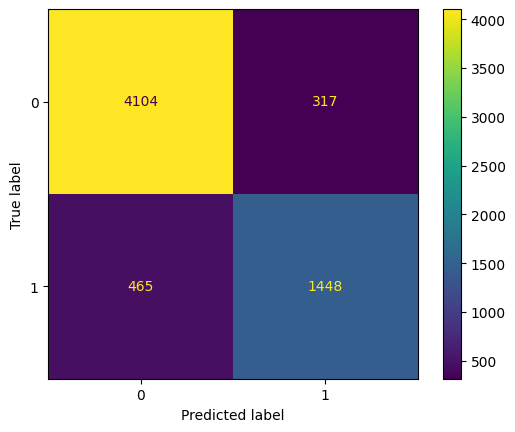

In [125]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_clf.classes_)
disp.plot()
plt.show()

Lưu model

In [119]:
filename = '/content/history/train_history.pickle'
pickle.dump(gb_clf, open(filename, 'wb'))

In [32]:
filename = '/content/history/train_history.pickle'
load_model = pickle.load(open(filename, 'rb'))
print(load_model)
y_pred = load_model.predict(X_test)
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))


GradientBoostingClassifier(learning_rate=0.5, n_estimators=500)
Accuracy: 0.894


Dự đoán

In [33]:
x = {
    'no_of_adults' : [1],
    'no_of_children' :[2],
    'no_of_weekend_nights' : [0],
    'no_of_week_nights' :[1],
    'type_of_meal_plan' : [2],
    'required_car_parking_space' : [1],
    'room_type_reserved' : [0],
    'lead_time' : [1] ,
    'arrival_year' : [1],
    'arrival_month' : [2],
    'arrival_date' : [2],
    'market_segment_type' : [1],
    'repeated_guest' : [0],
    'no_of_previous_cancellations' : [0],
    'no_of_previous_bookings_not_canceled' : [1],
    'avg_price_per_room' : [64],
    'no_of_special_requests' : [2]
}



p = pd.DataFrame(data=x)


In [34]:
load_model.predict(p)[0]

0